In [39]:
import pandas as pd
import numpy as np

In [40]:
def load(file):
    """Load the experiment data from a CSV file"""
    
    schema = {
        'First': np.int64(),
        'Last': np.int64(),
        'Parse': np.float64(),
        'Resize': np.float64(),
        'Serialize': np.float64(),
        'Pop': np.float64(),
    }
    
    df = pd.read_csv(file, dtype=schema)
    df.file = file
    
    return df

In [41]:
import os

def get_meta(path):
    """Returns (threads, num_jsons, repeats)"""

    props = os.path.splitext(os.path.basename(path))[0].split('_')
    values = [int(x[1:]) for x in props[1:]]

    return {'max_value':values[0],
            'max_num_values':values[1],
            'threads':values[2],
            'input_size_approx':values[3],
            'repeats':values[4]}

def analyze(df):
    """Analyze the experiment data, deriving various metrics."""
    
    df['Total'] = df['Parse'] + df['Resize'] + df['Serialize'] + df['Pop']
    
    for key, value in get_meta(df.file).items():
        df.attrs[key] = value
    
    return df

In [42]:
def summarize(df):
    """Summarize the data from all threads into one row."""
    
    row = {'Threads': df.attrs['threads'],
           'Input size': df.attrs['input_size_approx'],
           'Max. value': df.attrs['max_value'],
           'Max. num. values': df.attrs['max_num_values'],
           'Parse': df['Parse'].mean(),
           'Resize': df['Resize'].mean(),
           'Serialize': df['Serialize'].mean(),
           'Pop': df['Pop'].mean(),
           'Total': df['Total'].mean()}
              
    return row;

In [43]:
def make_summary_df(records):
    df = pd.DataFrame.from_records(records)
    df.sort_values(by=['Threads', 'Input size'], inplace=True)
    df.set_index(['Threads'], inplace=True)
    df.Parse = df.Parse * 1e-9
    df.Resize = df.Resize * 1e-9
    df.Serialize = df.Serialize * 1e-9
    df.Pop = df.Pop * 1e-9
    df.Total = df.Total * 1e-9
    
    return df

In [46]:
import glob

cpu_files = []
for file in glob.glob("../experiments/data-sigmax-sw-only-2/battery/latency/threads/latency/arrow/*.csv"):
    cpu_files.append(file)

cpu_records = []
for file in cpu_files:
    cpu_records.append(summarize(analyze(load(file))))

fpga_files = []
for file in glob.glob("../experiments/data-sigmax-sw-only-2/battery/latency/threads/latency/fpga/*.csv"):
    fpga_files.append(file)
    
fpga_records = []
for file in fpga_files:
    fpga_records.append(summarize(analyze(load(file))))

In [49]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = make_summary_df(cpu_records)
df = df[df['Max. num. values'] == 64]
#df = df[df['JSONs'] == df['JSONs'].max()]
#dff = make_summary_df(fpga_records)
#dff.set_index('Input size', inplace=True)

display(df)
#display(dff)

,Input size,Max. value,Max. num. values,Parse,Resize,Serialize,Pop,Total
Threads,,,,,,,,
1,16777216,18446744073709551615,64,0.145813,0.000051,0.001277,0.000042,0.147182
1,134217728,18446744073709551615,64,1.076768,0.000592,0.016762,0.000093,1.094215
1,1073741824,18446744073709551615,64,8.287011,0.003553,0.220657,0.000550,8.511771
1,8589934592,18446744073709551615,64,65.144873,0.016802,1.292065,0.004614,66.458354
4,16777216,18446744073709551615,64,0.057069,0.000022,0.000322,0.000023,0.057436
4,134217728,18446744073709551615,64,0.334366,0.000113,0.003868,0.000049,0.338396
4,1073741824,18446744073709551615,64,2.255064,0.000743,0.036848,0.000122,2.292778
4,8589934592,18446744073709551615,64,17.728991,0.007654,0.509882,0.001280,18.247806
8,16777216,18446744073709551615,64,0.034358,0.000015,0.000206,0.000015,0.034594


array([  16777216,  134217728, 1073741824, 8589934592])

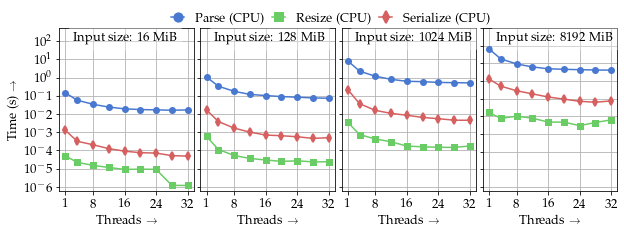

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 13
})

num_jsons = df['Input size'].unique()
num_jsons.sort()
display(num_jsons)

ymax = 8*df.Total.max()
ymin = df.Resize.min() / 2
tmin = df.index.min()
tmax = df.index.max()

cols = len(num_jsons)
rows = int(math.ceil(len(num_jsons)/cols))

xticks = list(range(0,tmax+1,8))
xticks[0] = 1

yrange = range(round(math.log10(ymin)), 4, 1)
yticks = [10**x for x in yrange]
yticklabels = ['$10^{}$'.format(x) for x in yrange]
yticklabels[-1] = str(1)

colors = ['#4878d0', '#6acc64', '#d65f5f', '#d5bb67', '#dc7ec0', '#8c613c']
markers = ['o','s','d']
ms = 5
mew = 2

fig, axs = plt.subplots(nrows=1, ncols=cols, figsize=[10, 3], sharex='all', sharey='all')
plt.subplots_adjust(wspace=0.05, hspace=0)
for i, n in enumerate(num_jsons):
    # Determine where to draw
    ax = axs[i]
    
    # Determine which experiment to draw
    subdf = df[df['Input size'] == n]
    # del subdf['JSONs']
    del subdf['Total']
    
    # Draw points
    ppa,=ax.plot(subdf.index, subdf.Parse, label='Parse', c=colors[0], marker=markers[0], mew=mew, ms=ms)
    pre,=ax.plot(subdf.index, subdf.Resize, label='Resize', c=colors[1], marker=markers[1], mew=mew, ms=ms)
    pse,=ax.plot(subdf.index, subdf.Serialize, label='Serialize', c=colors[2], marker=markers[2], mew=mew, ms=ms)
    
    # Draw FPGA horizontal lines
    # if n >= dff.index.min():
    #    fpa=ax.hlines(y=dff.loc[n].Parse, xmin=tmin, xmax=tmax, colors=colors[0], linestyle='dashed')
    #    fre=ax.hlines(y=dff.loc[n].Resize, xmin=tmin, xmax=tmax, colors=colors[1], linestyle='dashed')
    #    fse=ax.hlines(y=dff.loc[n].Serialize, xmin=tmin, xmax=tmax, colors=colors[2], linestyle='dashed')
    
    # Set title
    ax.annotate('Input size: {:.0f} MiB'.format(n/(2**20)), 
                xycoords='axes fraction', 
                xy=(0.1, 0.92), 
                backgroundcolor=(1, 1, 1, 0.33))
    
    # Set labels
    if i == 0:
        ax.set_ylabel('Time (s) →')
    else:
        ax.set_ylabel('')
    
    ax.set_xlabel('Threads →')
    
    # Set limits and scale
    ax.set_ylim([ymin, ymax])
    ax.set_yscale('log')

    # Set ticks and grid
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.grid(which='both')
            
#fig.legend([ppa, fpa, pre, fre, pse, fse], ['Parse (CPU)', 'Parse (FPGA)', 
#                                            'Resize (CPU)', 'Resize (FPGA)',
#                                            'Serialize (CPU)', 'Serialize (FPGA)'], 
fig.legend([ppa,  pre,  pse], 
           ['Parse (CPU)', 'Resize (CPU)', 'Serialize (CPU)',], 
           bbox_to_anchor=[-0.26, 0.01, 1, 1],
           ncol=3, 
           frameon=None, shadow=None, framealpha=0.0,
           markerscale=1.64,
           columnspacing=0.6,
           handlelength=1.0)
    
fig.savefig('jsonsthreadstime.pdf', bbox_inches='tight')
